In [1]:
import json
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import json
from pprint import pprint

with open('Grocery_and_Gourmet_Food.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

dataset = pd.DataFrame(data)

In [5]:
dataset.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5.0,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,NaN,NaN,NaN
1,4.0,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,NaN,NaN,NaN
2,4.0,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,NaN,NaN,NaN
3,5.0,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,NaN,NaN,NaN
4,4.0,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,NaN,NaN,NaN


A small examplanion for each column:
- overall - rating of the product
- verified - verified 
- reviewTime - time of the review (raw)
- reviewerID - ID of the reviewer
- asin - ID of the product
- reviewerName - name of the reviewer
- reviewText - text of the review
- summary - summary of the review
- unixReviewTime - time of the review (unix time)
- vote - helpful votes of the review (number of votes saying that review is useful)
- image - image of the product
- style - a disctionary of the product metadata



**Lets fix the format of the reviewTime, Overall and Verified columns**

In [6]:
def format_dataset(dataset):
    dataset["overall"] = dataset["overall"].astype(int)
    dataset["verified"] = dataset["verified"].astype(bool)

    
    # Cast reviewTime to date
    dataset["reviewTime"] = dataset["reviewTime"].str.replace("^0", "")
    dataset["reviewTime"] = pd.to_datetime(dataset["reviewTime"], format="%m %d, %Y")

In [7]:
#fix the format
format_dataset(dataset)
dataset.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5,True,2013-06-04,ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,NaN,NaN,NaN
1,4,True,2014-05-23,A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,NaN,NaN,NaN
2,4,True,2014-05-09,A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,NaN,NaN,NaN
3,5,True,2014-04-20,A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,NaN,NaN,NaN
4,4,True,2014-04-16,A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,NaN,NaN,NaN


# Data Analysis

In [8]:
##extract year and month
dataset['reviewYear'] = dataset['reviewTime'].map(lambda x: x.strftime('%Y'))
dataset['reviewMonth'] = dataset['reviewTime'].map(lambda x: x.strftime('%m'))
dataset['reviewMonth']=dataset["reviewMonth"].astype(int)

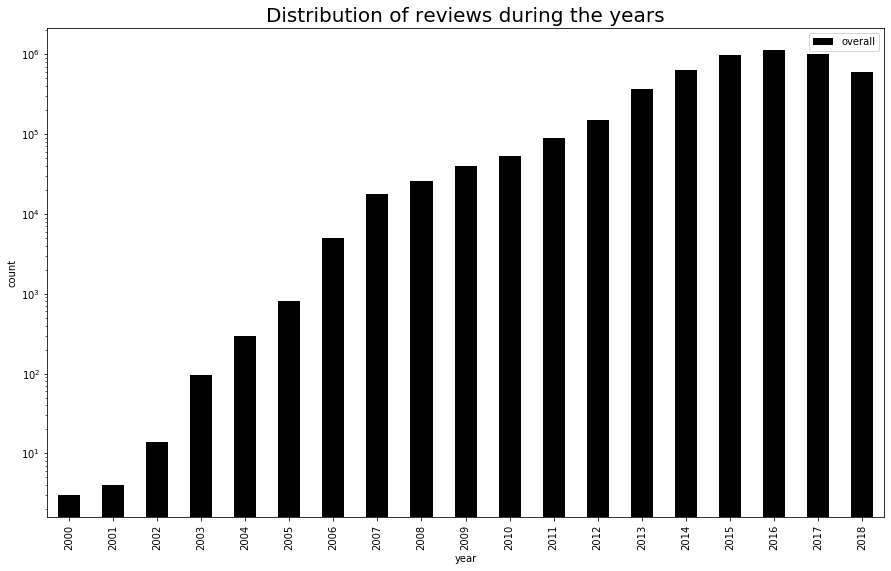

In [9]:
##plot how many reviews we have for each year
d = dataset[['overall','reviewYear']].copy()
groupby_year = d.groupby('reviewYear').count()

color = plt.cm.copper(np.linspace(0, 100, 150))
groupby_year.sort_values(by=['reviewYear']).plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of reviews during the years', fontsize = 20)
plt.xlabel('year')
plt.ylabel('number of reviews')
plt.yscale("log")
plt.show()

**During the years more and more people buy foods from amazon and put there review. We will try to go deeper to see what kind of food we bought and if it relevant with google trends**

##  Healthy Food and Sweets Analysis 

In [36]:
##keep only the rows which dont have Nan values at summary and reviewText
d=dataset[dataset["summary"].notnull() | dataset["reviewText"].notnull()]

##the list of healthy vs sweets words
healthy_food=["vegetarianism","veganism","organic","healthy","vegan"]
sweets=["sweet","chocolate","cake","pancakes","cheesacake","Wafers","cookies","brownies"]

In [37]:
##new dataframe which contains only the trends words
healthy_data=d[d["summary"].str.contains('|'.join(healthy_food)) | d["reviewText"].str.contains('|'.join(healthy_food))]
sweets_data=d[d["summary"].str.contains('|'.join(sweets)) | d["reviewText"].str.contains('|'.join(sweets))]
print("healthy food: ",healthy_data.shape[0])
print("Sweets: ",sweets_data.shape[0])

healthy food:  193665
Sweets:  549187


**lets go deeper during the years and months**

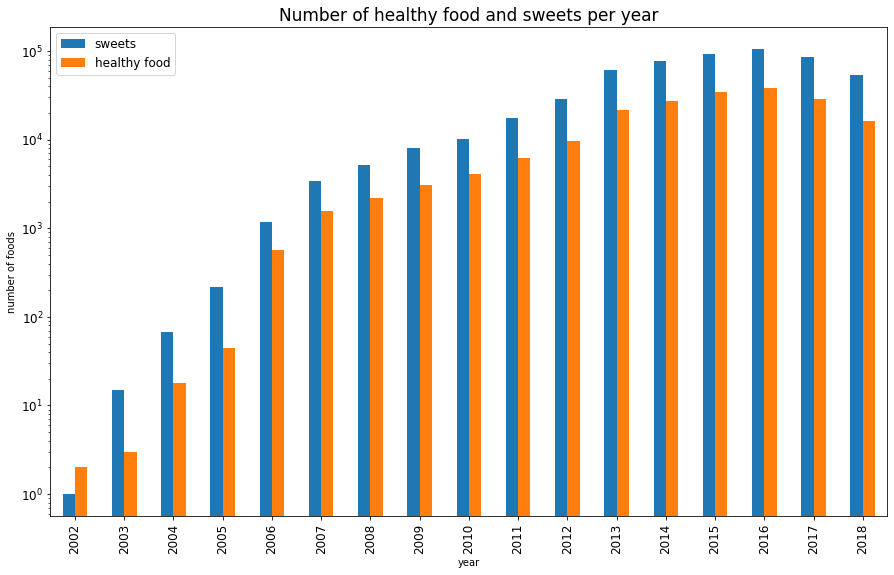

In [38]:

sweets_over_time = sweets_data.groupby('reviewYear').size()
healthy_over_time = healthy_data.groupby('reviewYear').size()


data_year = pd.DataFrame(sweets_over_time, columns=['sweets'])
data_year['healthy food'] = pd.Series(healthy_over_time)

data_year.plot.bar(figsize=(15, 9))
plt.xlabel('year')
plt.ylabel('number of foods')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of healthy food and sweets per year', fontsize=17)

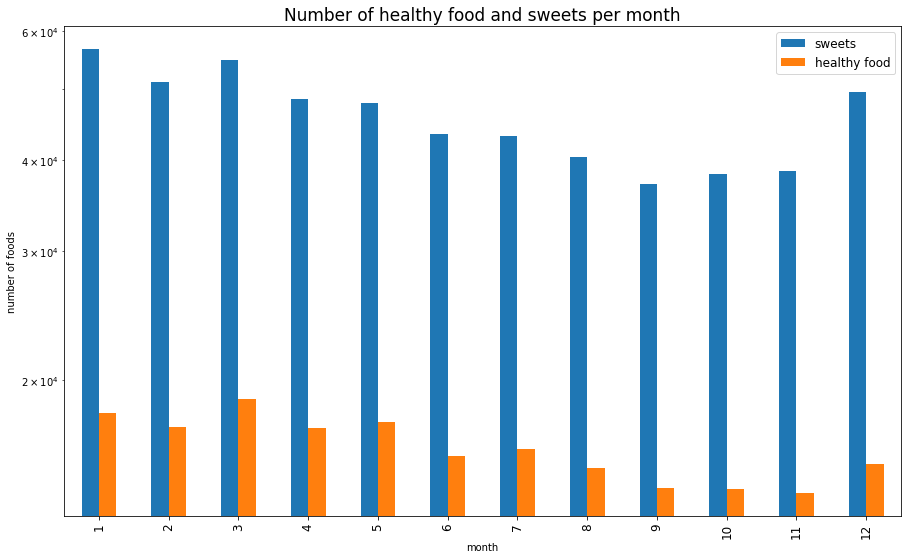

In [39]:
sweets_over_time = sweets_data.groupby('reviewMonth').size()
healthy_over_time = healthy_data.groupby('reviewMonth').size()


data_month = pd.DataFrame(sweets_over_time, columns=['sweets'])
data_month['healthy food'] = pd.Series(healthy_over_time)

data_month.plot.bar(figsize=(15, 9))
plt.xlabel('month')
plt.ylabel('number of foods')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of healthy food and sweets per month', fontsize=17)

## holidays - Celebrations

**We will check the following holidays-celebrations:**
- summer 
- easter 
- Chistmas 
- halloween 
- black friday 
- birthday 
- anniversary 
- valentines day 
- wedding 
- thanksgiving 

In [34]:
##the list of holidays words
holidays=["summer","easter","Chistmas","halloween","black friday","birthday","anniversary","valentines day","wedding", "thanksgiving"]

In [35]:
##lets focus on the trends list and check exactly how many rows have each of the trend
for i in holidays:
    print(i,d[d["summary"].str.contains(str(i)) | d["reviewText"].str.contains(str(i))].shape[0])

summer 17767
easter 1463
Chistmas 29
halloween 871
black friday 16
birthday 26969
anniversary 1300
valentines day 429
wedding 11213
thanksgiving 480


**Lets focus more on the birthday, summer, easter, anniversary, wedding during the years and months**

In [41]:
summer = d[d["summary"].str.contains(str("summer")) | d["reviewText"].str.contains(str("summer"))]
easter = d[d["summary"].str.contains(str("easter")) | d["reviewText"].str.contains(str("easter"))]
anniversary = d[d["summary"].str.contains(str("anniversary")) | d["reviewText"].str.contains(str("anniversary"))]
wedding = d[d["summary"].str.contains(str("wedding")) | d["reviewText"].str.contains(str("wedding"))]

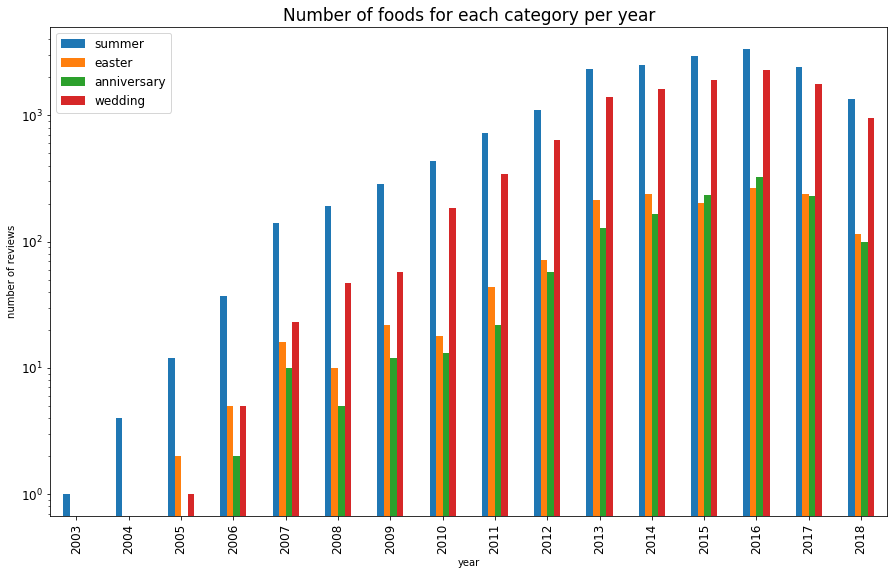

In [42]:
summer_over_time = summer.groupby('reviewYear').size()
easter_over_time = easter.groupby('reviewYear').size()
anniversary_over_time = anniversary.groupby('reviewYear').size()
wedding_over_time = wedding.groupby('reviewYear').size()


data_year = pd.DataFrame(summer_over_time, columns=['summer'])
data_year['easter'] = pd.Series(easter_over_time)
data_year['anniversary'] = pd.Series(anniversary_over_time)
data_year['wedding'] = pd.Series(wedding_over_time)


data_year.plot.bar(figsize=(15, 9))
plt.xlabel('year')
plt.ylabel('number of reviews')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of foods for each category per year', fontsize=17)

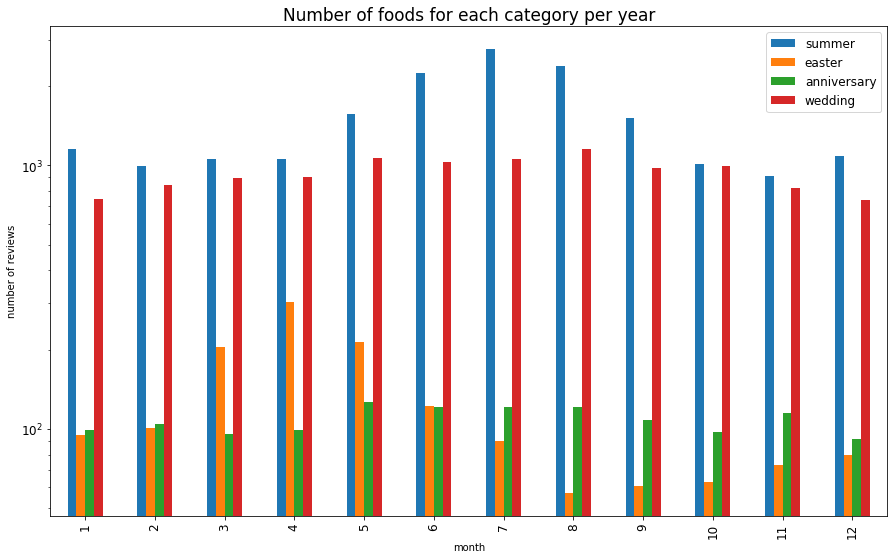

In [43]:
summer_over_time = summer.groupby('reviewMonth').size()
easter_over_time = easter.groupby('reviewMonth').size()
anniversary_over_time = anniversary.groupby('reviewMonth').size()
wedding_over_time = wedding.groupby('reviewMonth').size()


data_month = pd.DataFrame(summer_over_time, columns=['summer'])
data_month['easter'] = pd.Series(easter_over_time)
data_month['anniversary'] = pd.Series(anniversary_over_time)
data_month['wedding'] = pd.Series(wedding_over_time)


data_month.plot.bar(figsize=(15, 9))
plt.xlabel('month')
plt.ylabel('number of reviews')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of foods for each category per year', fontsize=17)

## different kind of food

**Searching on google trends we found the following types of food on very top on the list:**
- chinese food
- traditional food
- korean food
- jamaican food
- mediterranean food
- mexican food

In [45]:
types_of_food=["chinese food","traditional food","korean food","jamaican food","mediterranean food","mexican food"]

for i in types_of_food:
    print(i,d[d["summary"].str.contains(str(i)) | d["reviewText"].str.contains(str(i))].shape[0])

chinese food 106
traditional food 76
korean food 15
jamaican food 1
mediterranean food 5
mexican food 142
